In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Dense
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D

from keras.datasets import imdb

In [2]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)

# restore np.load for future normal usage
np.load = np_load_old

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
# 훈련셋과 검증셋 분리
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

print('x_train shape:', x_train.shape)

x_train shape: (20000,)


In [0]:
# 데이터셋 전처리
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [0]:
# 모델 구성
model = Sequential()
model.add(Embedding(20000, 128))
model.add(Conv1D(256, # filters
                 3, # kernel_size
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 256)         98560     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,855,809
Trainable params: 2,855,809
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # 모델 학습과정 설정

hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))
# 모델 학습시키기

scores = model.evaluate(x_train, y_train, verbose=0) # 테스트 데이터에 대해서 정확도 평가
print("정확도: %.2f%%" % (scores[1]*100))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3274 - acc: 0.8595 - val_loss: 0.3396 - val_acc: 0.8496
Epoch 2/25
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1607 - acc: 0.9407 - val_loss: 0.3340 - val_acc: 0.8772
Epoch 3/25
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0824 - acc: 0.9734 - val_loss: 0.4409 - val_acc: 0.8594
Epoch 4/25
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.5912 - val_acc: 0.8556
Epoch 5/25
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0222 - acc: 0.9929 - val_loss: 0.5853 - val_acc: 0.8512
Epoch 6/25
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0196 - acc: 0.9945 - val_loss: 0.6747 - val_acc: 0.8614
Epoch 7/25
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0161 - acc: 0.9951 - val_loss: 0.8085 - val_acc:

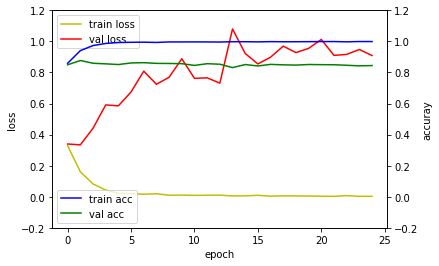

In [14]:
# 학습과정
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
# 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 5s 204us/step
## evaluation loss and_metrics ##
[1.0106840735626221, 0.829079999961853]
